In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D=pd.read_csv(r'C:\Users\dell\Downloads\train.csv')
print(D.head(5))
l=D['label']
d=D.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\dell\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


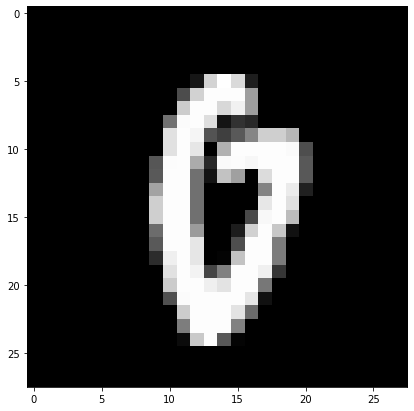

0


In [59]:
plt.figure(figsize=(7,7))
idx=251

grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

In [47]:

print("the shape of sample data=",d.shape)
print("the shape of sample data=",l.shape)

the shape of sample data= (42000, 784)
the shape of sample data= (42000,)


In [16]:
from sklearn.preprocessing import StandardScaler
standerdized_data=StandardScaler().fit_transform(d)
print(standerdized_data.shape)

(42000, 784)


In [17]:
data= standerdized_data
covar_mat=np.matmul(data.T,data)
print("the shape of matrix =", covar_mat.shape)

the shape of matrix = (784, 784)


In [19]:
from scipy.linalg import eigh
values,vector= eigh(covar_mat,eigvals=(782,783))
print("shape of eigen vector =",vector.shape)

vector=vector.T
print("new shape is=",vector.shape)

shape of eigen vector = (784, 2)
new shape is= (2, 784)


In [51]:
import matplotlib.pyplot as plt
new_coordinates= np.matmul(vector,data.T)
print("resultant new data points' shape", vector.shape,"X",d.T.shape,"=", new_coordinates.shape)

resultant new data points' shape (2, 784) X (784, 42000) = (2, 42000)


In [52]:
import pandas as pd 
new_coordinates=np.vstack((new_coordinates,l)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","l"))
print(dataframe.head())

   1st_principal  2nd_principal    l
0      -5.226445      -5.140478  1.0
1       6.032996      19.292332  0.0
2      -1.705813      -7.644503  1.0
3       5.836139      -0.474207  4.0
4       6.024818      26.559574  0.0


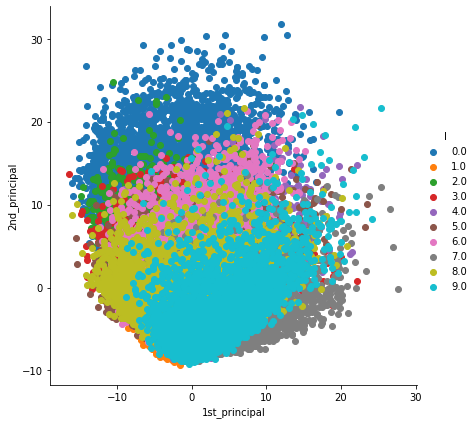

In [57]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="l",height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()